# Introduction to Matplotlib

In [1]:
import random

from matplotlib.pyplot import scatter
%matplotlib inline
# This makes sure that all the data visualization stays within the node book. (That's all I know about the code above)
# Aaaand this is what GPT told: "(right below the cell that creates them), instead of opening a separate window."
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Let's just plot :)

[]

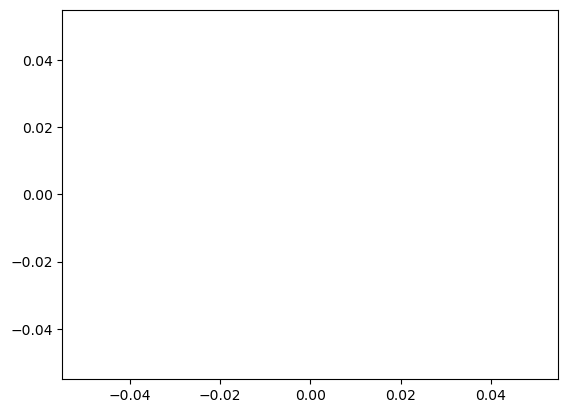

In [2]:
plt.plot()

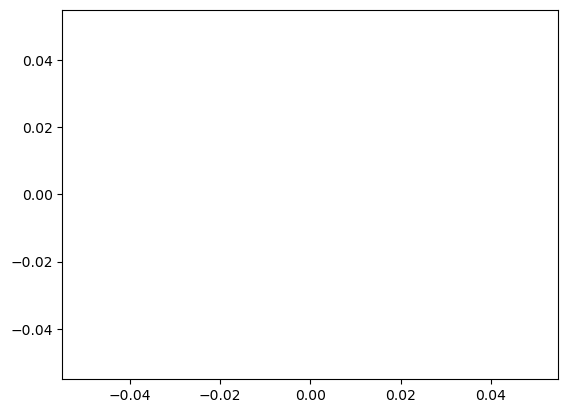

In [3]:
# to get rid of []
plt.plot();
# Or you can do
# plt.plot()
# plt.show()

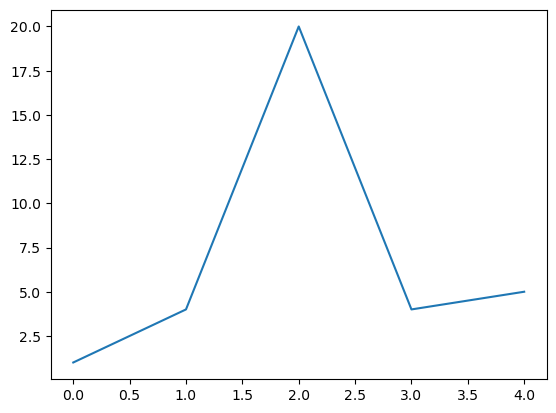

In [4]:
plt.plot([1, 4, 20 , 4, 5])

* Mind that in this case Matplotlib is implying that element index is the x-axis.

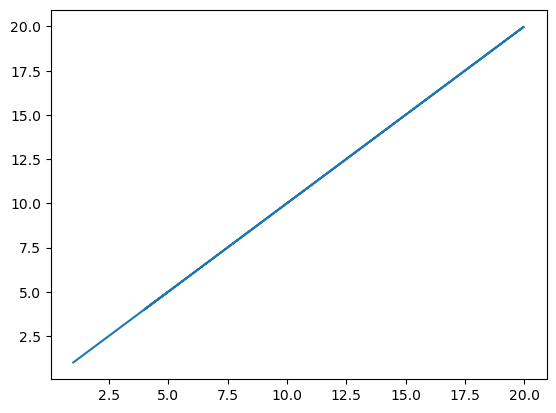

In [5]:
plt.plot([1, 4, 20 , 4, 5], [1, 4, 20 , 4, 5])
# He heee its me acting crazy :)

### Important thing to mind is that,
The method we practised above to plot data is not recommended even though it looks simpler.
Down below shows the recommended Object-Oriented approach.

Perfect question 👏 — this is where most people get confused when switching from the **pyplot style** (`plt.plot(...)`) to the **object-oriented (OO)** Matplotlib approach.
Let’s break down exactly what happens when you call `add_subplot()`.

---

### 🧩 Step 1: The OO mindset

In the **OO style**, you explicitly work with two main objects:

* **`Figure`** → the overall canvas (like the paper)
* **`Axes`** → a single plotting area (like one chart drawn on that paper)

So:

```python
fig = plt.figure()      # creates a blank canvas
ax = fig.add_subplot()  # adds a single set of axes (your plot area)
```

After this, you can call methods **on `ax`** (not `plt`):

```python
ax.plot([1, 2, 3], [4, 5, 6])
```

---

### 🧠 Step 2: What `add_subplot()` actually does

#### Basic usage:

```python
ax = fig.add_subplot(111)
```

The argument `111` is shorthand for:

```
(nrows, ncols, index)
```

So `111` means:

* 1 row
* 1 column
* this is subplot number 1

So basically → “make a 1×1 grid and give me the first (and only) axes.”

If you wanted **multiple plots**, for example 2 plots side by side:

```python
ax1 = fig.add_subplot(121)   # 1 row, 2 cols, first plot
ax2 = fig.add_subplot(122)   # 1 row, 2 cols, second plot
```

---

### 🔍 Step 3: It returns an `Axes` object

The `add_subplot()` call creates and returns an **`Axes`** object — that’s your main handle to draw on.

You can then do:

```python
ax.plot([1, 2, 3], [4, 5, 6])
ax.set_title("My Graph")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
```

---

### ✅ Step 4: Modern shortcut

You can skip `add_subplot()` entirely using:

```python
fig, ax = plt.subplots()
```

which internally does the same thing — creates a figure *and* a single subplot for you.

---

### 🔸 Summary

| Method                      | Purpose                               |
| --------------------------- | ------------------------------------- |
| `plt.plot(...)`             | Quick one-liner (stateful API)        |
| `fig = plt.figure()`        | Creates a blank canvas                |
| `ax = fig.add_subplot(111)` | Adds 1 subplot (1×1 grid, first plot) |
| `fig, ax = plt.subplots()`  | Cleaner shortcut for the same thing   |

---

So think of `add_subplot()` as:

> “Hey Figure, create me one plot area (Axes) in a grid, and hand me the control handle so I can draw on it.”

Would you like me to show visually (with ASCII boxes) how the grid setup (`add_subplot(221)` etc.) maps to subplot layout?


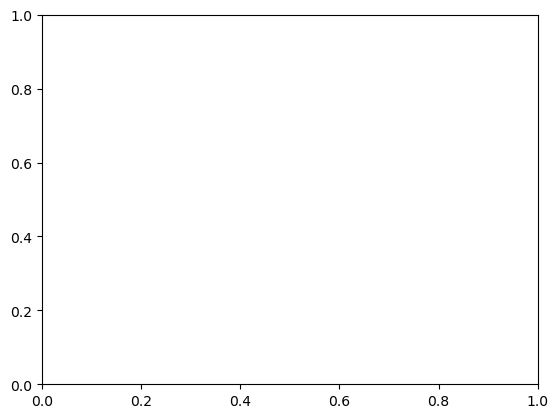

In [6]:
# 1st method
fig = plt.figure() # creates a blank figure
ax = fig.add_subplot() # Check the note above you will notice that this is a shorthand for "Create a one subPlot"
plt.show()


 🧠 What happens behind the scenes
 --------------------------------
 • Every time we create a figure (plt.figure()), Matplotlib registers it internally
   in a global list managed by pyplot.

 • When we call plt.show(), Matplotlib looks at this list and displays *all* active figures
   it knows about (fig1, fig2, etc.).

 • This is why plt.show() doesn’t need any arguments — it automatically renders everything.

 • If we want to display only one figure manually, we can use fig.show() instead.

 • Once shown (especially outside Jupyter), figures are usually cleared from memory
   unless we keep a reference to them (like fig1, fig2).


In [7]:
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

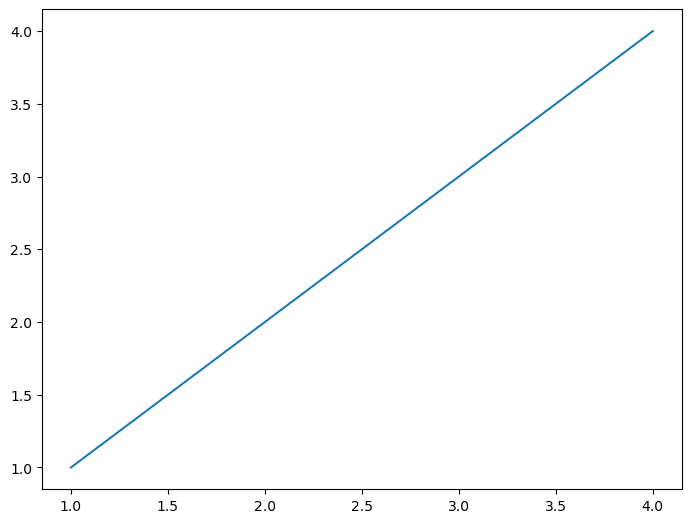

In [8]:
# 2nd method
fig = plt.figure()
ax = fig.add_axes([1, 1, 1, 1]) # Mind that axes in this case does not give the meaning of x and y axes meaning but the whole graph (refer the anatomy of matplotlib picture below)
ax.plot(x, y)
plt.show()


🎯 The purpose of add_axes()

add_axes() gives you manual control over where exactly the plot (axes) is placed inside the figure.

It’s different from add_subplot() because add_subplot() uses a grid system (like 1×1, 2×2 layouts),
while add_axes() uses absolute positioning (you tell it exactly where to go).

🧠 Syntax
ax = fig.add_axes([left, bottom, width, height])


These 4 numbers are ratios (not pixels), and each one goes from 0.0 to 1.0 relative to the figure’s size:

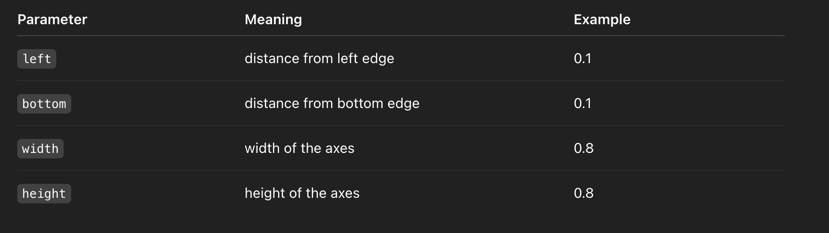

So:

fig.add_axes([0.1, 0.1, 0.8, 0.8])


means → draw the axes starting a bit inside the figure (10% from left, 10% from bottom),
taking up 80% of width and height.

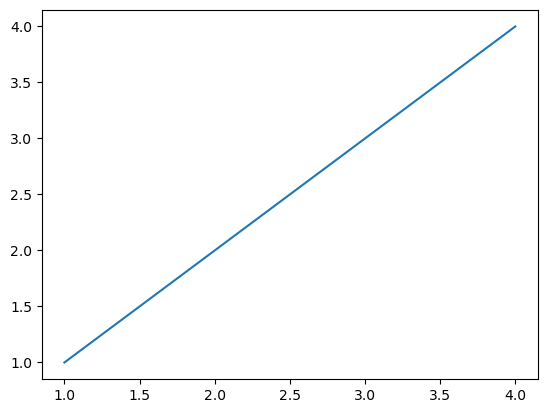

In [9]:
# 3rd method (recommended)
fig, ax = plt.subplots() # Mind that earlier it was `subplot()` (There was no "s")
# This feels like a shorthand for approach #1
ax.plot(x, y)

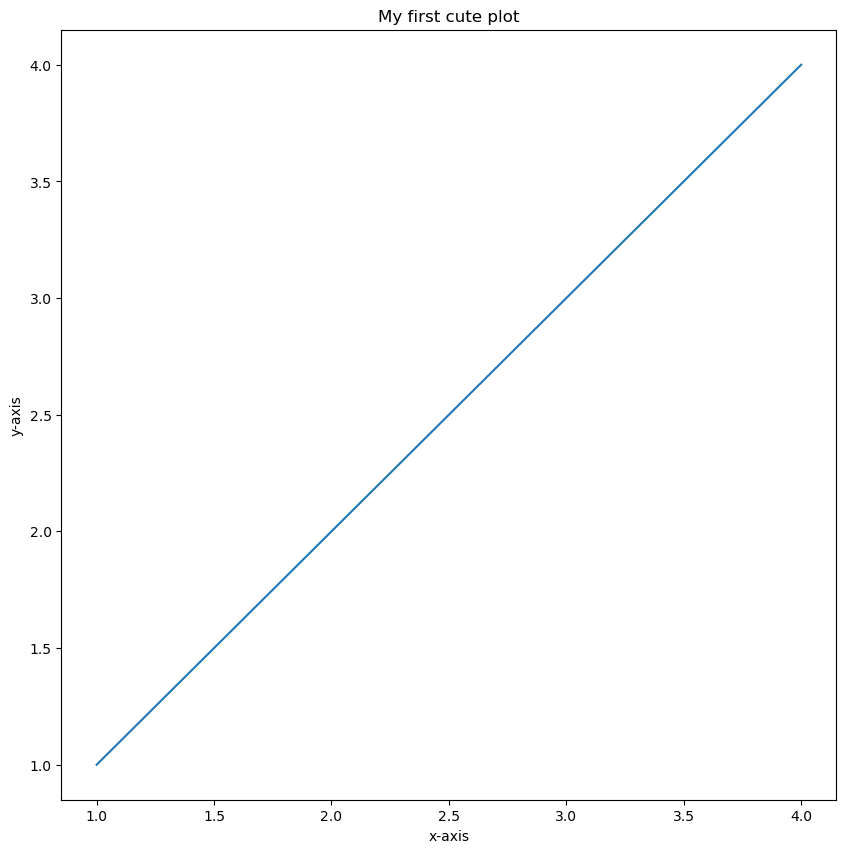

In [10]:
# Let's create something complete with cute stuff added.
fig, ax = plt.subplots(figsize = (10, 10)) # setting up dimensions
ax.plot(x, y)
ax.set(
    title = "My first cute plot",
    xlabel = "x-axis",
    ylabel = "y-axis",
)
fig.savefig("./Exports/My first cute plot.png")

Matplotlib only “renders” the figure when you tell it to:

either explicitly, with plt.show() or fig.savefig()

or implicitly (in Jupyter) when the cell finishes running.

So when you later do:

ax.set(title="My first cute plot", xlabel="x-axis", ylabel="y-axis")


you’re still editing the same Axes object that holds the plotted line.
You’re just updating its metadata — titles, labels, etc.

In [11]:
# Creating some data for future computations
x = np.linspace(0, 10, 100) # Returns 100 values that are evenly spaced between 0 and 10
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

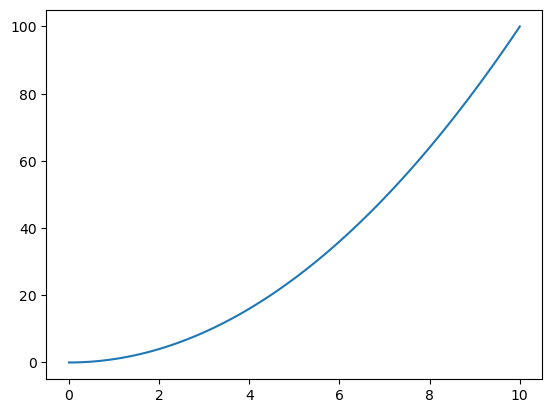

In [12]:
# Line plot
fig, ax = plt.subplots()
ax.plot(x, x ** 2)

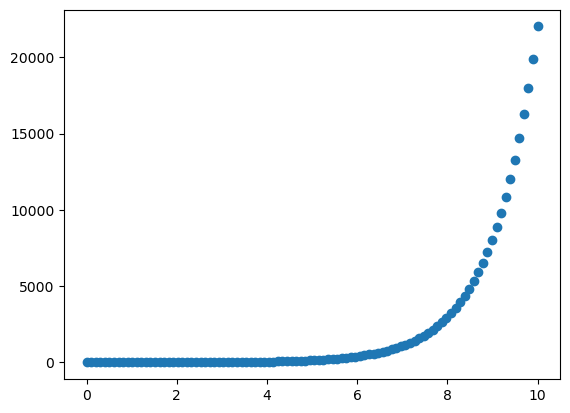

In [13]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x))

<BarContainer object of 3 artists>

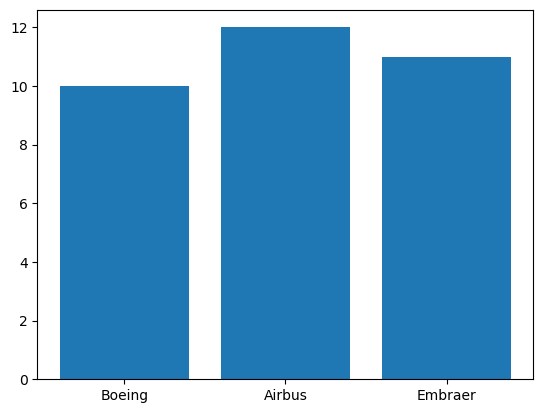

In [14]:
# Bar
plane_info = {
    "Boeing": 10,
    "Airbus": 12,
    "Embraer": 11
}
fig, ax = plt.subplots()
ax.bar(plane_info.keys(), plane_info.values())

In [15]:
# fig, ax = plt.subplots()
ax.barh(plane_info.keys(), plane_info.values())

<BarContainer object of 3 artists>

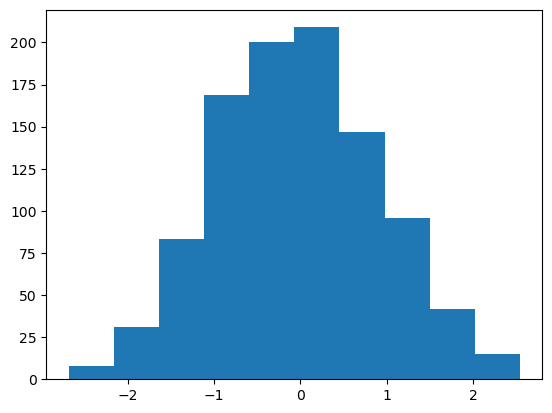

In [16]:
x = np.random.randn(1000) # We use the following function to obtain a normal distribution (Gaussian distribution) Here we will get 1000 entries
fig, ax = plt.subplots()
ax.hist(x);

(array([  8.,  31.,  83., 169., 200., 209., 147.,  96.,  42.,  15.]),
 array([-2.67837809, -2.15677914, -1.6351802 , -1.11358126, -0.59198231,
        -0.07038337,  0.45121558,  0.97281452,  1.49441346,  2.01601241,
         2.53761135]),
 <BarContainer object of 10 artists>)

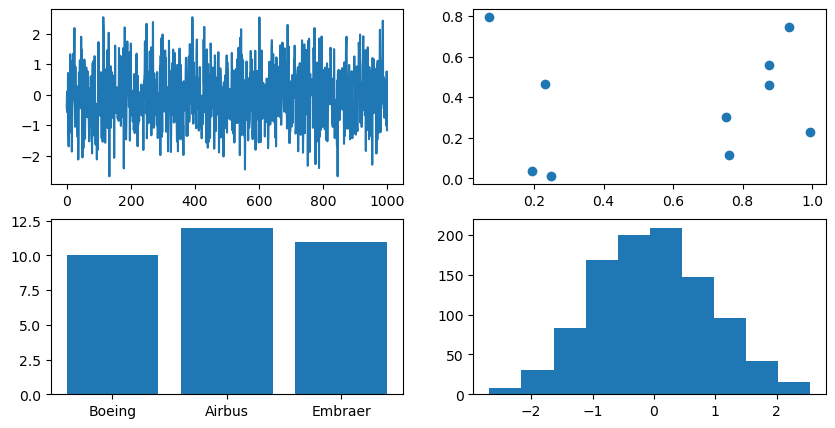

In [17]:
# Master figure here
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize = (10, 5)
)

ax1.plot(x)
ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(plane_info.keys(), plane_info.values())
ax4.hist(x)

(array([  8.,  31.,  83., 169., 200., 209., 147.,  96.,  42.,  15.]),
 array([-2.67837809, -2.15677914, -1.6351802 , -1.11358126, -0.59198231,
        -0.07038337,  0.45121558,  0.97281452,  1.49441346,  2.01601241,
         2.53761135]),
 <BarContainer object of 10 artists>)

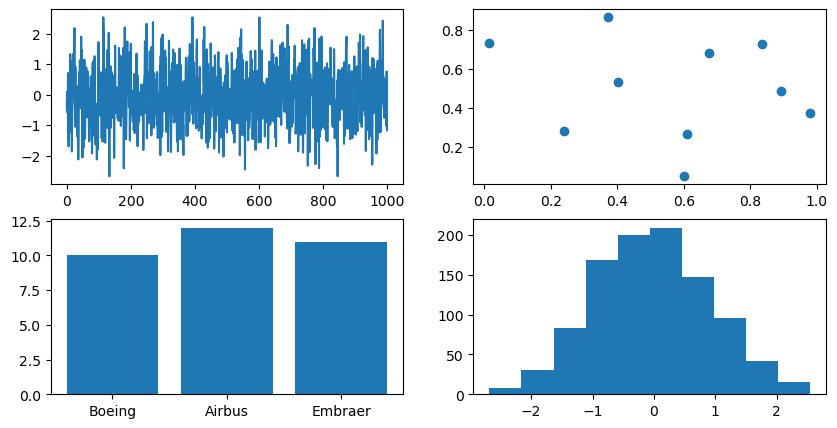

In [18]:
# Another way to replicate what is up

fig, ax = plt.subplots(
    nrows = 2,
    ncols = 2,
    figsize = (10, 5)
)

ax[0, 0].plot(x)
ax[0, 1].scatter(np.random.random(10), np.random.random(10))
ax[1, 0].bar(plane_info.keys(), plane_info.values())
ax[1, 1].hist(x)


### Visualisation using Pandas

In [19]:
import pandas as pd

df = pd.read_csv("Resources/car-sales.csv")
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


<Axes: >

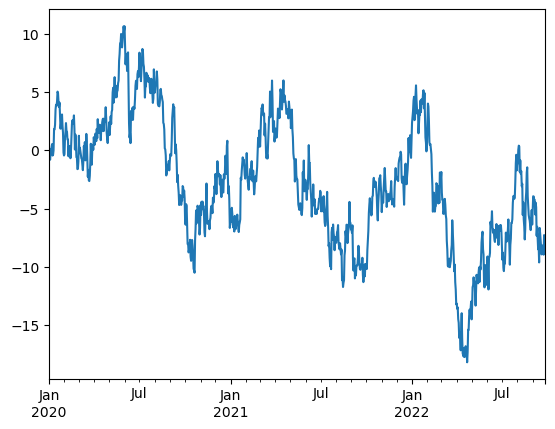

In [20]:
dateBits = pd.Series(np.random.randn(1000), index = pd.date_range("1/1/2020", periods = 1000))
x_values = dateBits.cumsum()
x_values.plot()

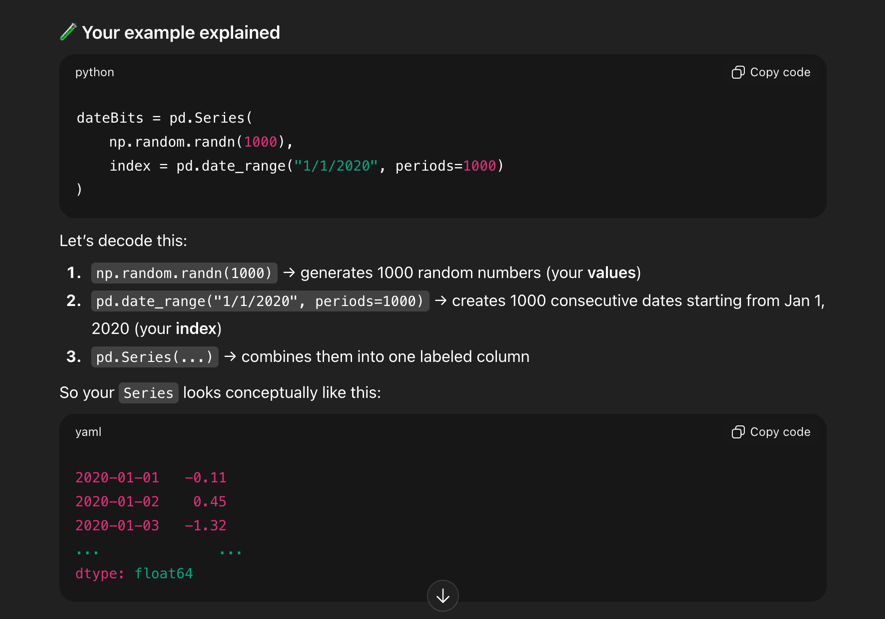

In [21]:
df["Price"] = pd.to_numeric(
    df["Price"].str.replace(r"[^\d.\-]", "", regex=True),
    errors="coerce"
)

In [22]:
df.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0


In [23]:
df["Price"] #Just to check :)

0     4000.0
1     5000.0
2     7000.0
3    22000.0
4     3500.0
5     4500.0
6     7500.0
7     7000.0
8     6250.0
9     9700.0
Name: Price, dtype: float64

In [24]:
df["Sale date"] = pd.date_range("1/1/2020", periods = df.shape[0])
df.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale date
0,Toyota,White,150043,4,4000.0,2020-01-01
1,Honda,Red,87899,4,5000.0,2020-01-02
2,Toyota,Blue,32549,3,7000.0,2020-01-03
3,BMW,Black,11179,5,22000.0,2020-01-04
4,Nissan,White,213095,4,3500.0,2020-01-05


In [25]:
df["Total gained"] = df["Price"].cumsum()
df.head()

,Make,Colour,Odometer (KM),Doors,Price,Sale date,Total gained
0,Toyota,White,150043,4,4000.0,2020-01-01,4000.0
1,Honda,Red,87899,4,5000.0,2020-01-02,9000.0
2,Toyota,Blue,32549,3,7000.0,2020-01-03,16000.0
3,BMW,Black,11179,5,22000.0,2020-01-04,38000.0
4,Nissan,White,213095,4,3500.0,2020-01-05,41500.0


<Axes: xlabel='Sale date'>

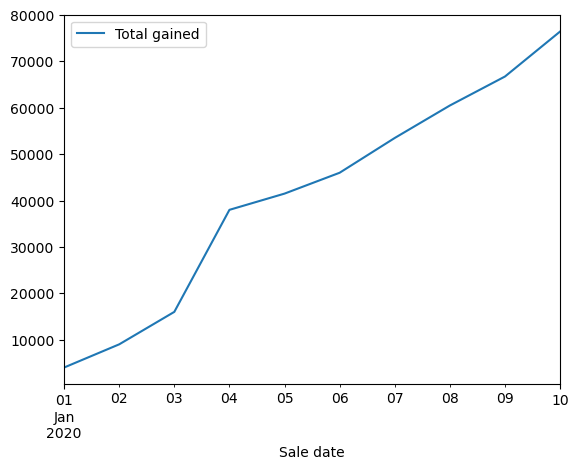

In [26]:
# There is a easier way to plot pandas dfs.
df.plot(x = "Sale date", y = "Total gained")

<Axes: xlabel='Odometer (KM)', ylabel='Price'>

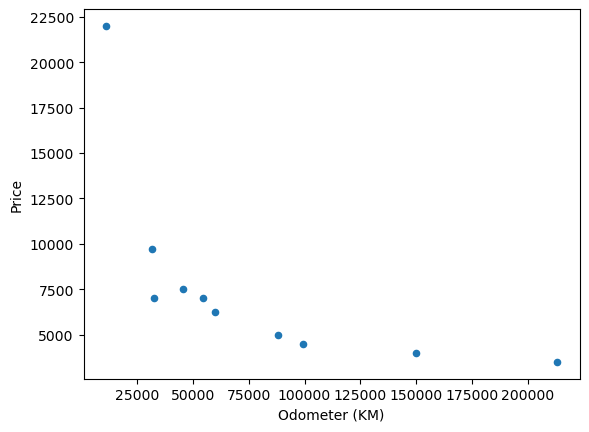

In [27]:
df.plot(x = "Odometer (KM)", y = "Price", kind="scatter")

## More graph plotting with pandas dfs

In [28]:
x = np.random.rand(10, 4)
classic_dataframe = pd.DataFrame(x, columns=["a", "b", "c", "d"])
classic_dataframe

,a,b,c,d
0,0.483542,0.960169,0.285134,0.374932
1,0.152965,0.769399,0.735872,0.809598
2,0.761493,0.080712,0.078746,0.430829
3,0.001289,0.581108,0.722277,0.803301
4,0.821138,0.662086,0.892035,0.527417
5,0.831917,0.021037,0.243029,0.529848
6,0.309372,0.893519,0.124432,0.313582
7,0.805188,0.361363,0.250778,0.749854
8,0.816751,0.383691,0.612563,0.240223
9,0.950350,0.206081,0.455571,0.814986


<Axes: >

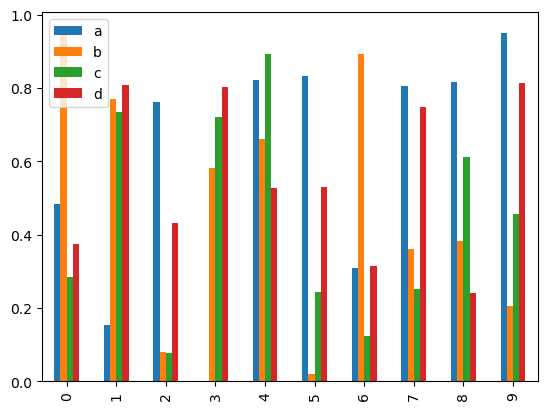

In [29]:
classic_dataframe.plot.bar()

<Axes: >

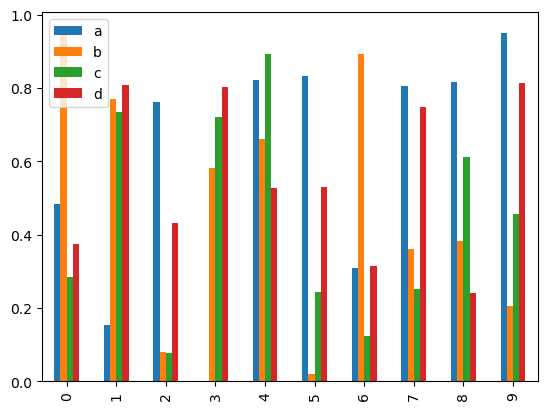

In [30]:
# Another ways to do the same
classic_dataframe.plot(kind="bar")

<Axes: ylabel='Frequency'>

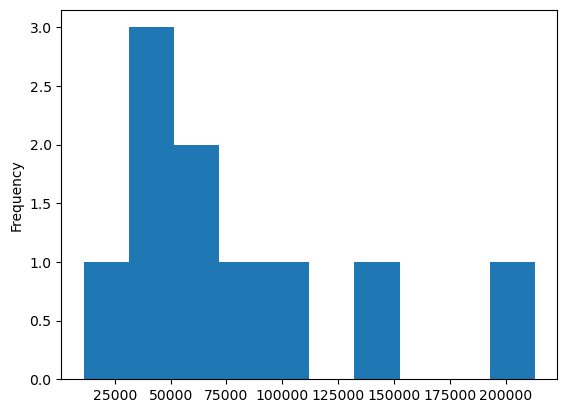

In [31]:
df["Odometer (KM)"].plot(kind="hist")

<Axes: ylabel='Frequency'>

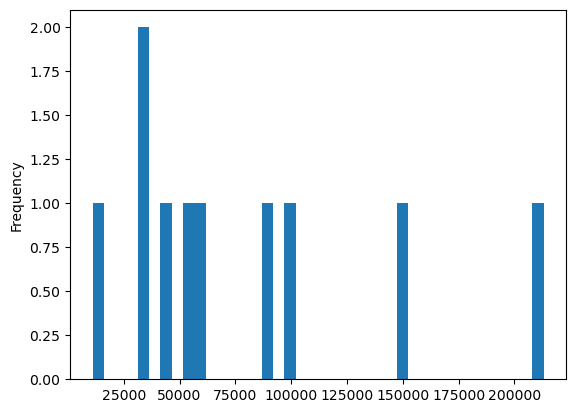

In [32]:
df["Odometer (KM)"].plot.hist(bins = 40)

In [33]:
heart_disease = pd.read_csv("Resources/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='Frequency'>

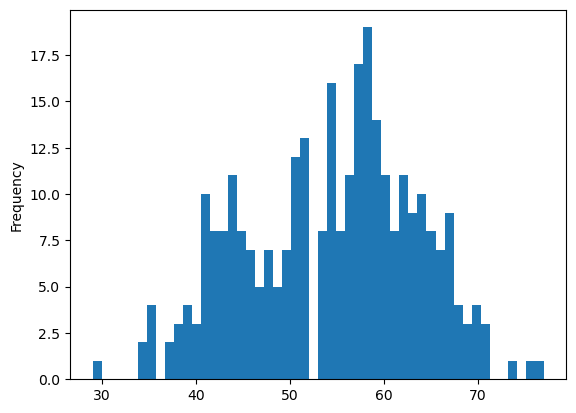

In [34]:
# Let's just create a histogram of age
heart_disease["age"].plot.hist(bins = 50)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
      dtype=object)

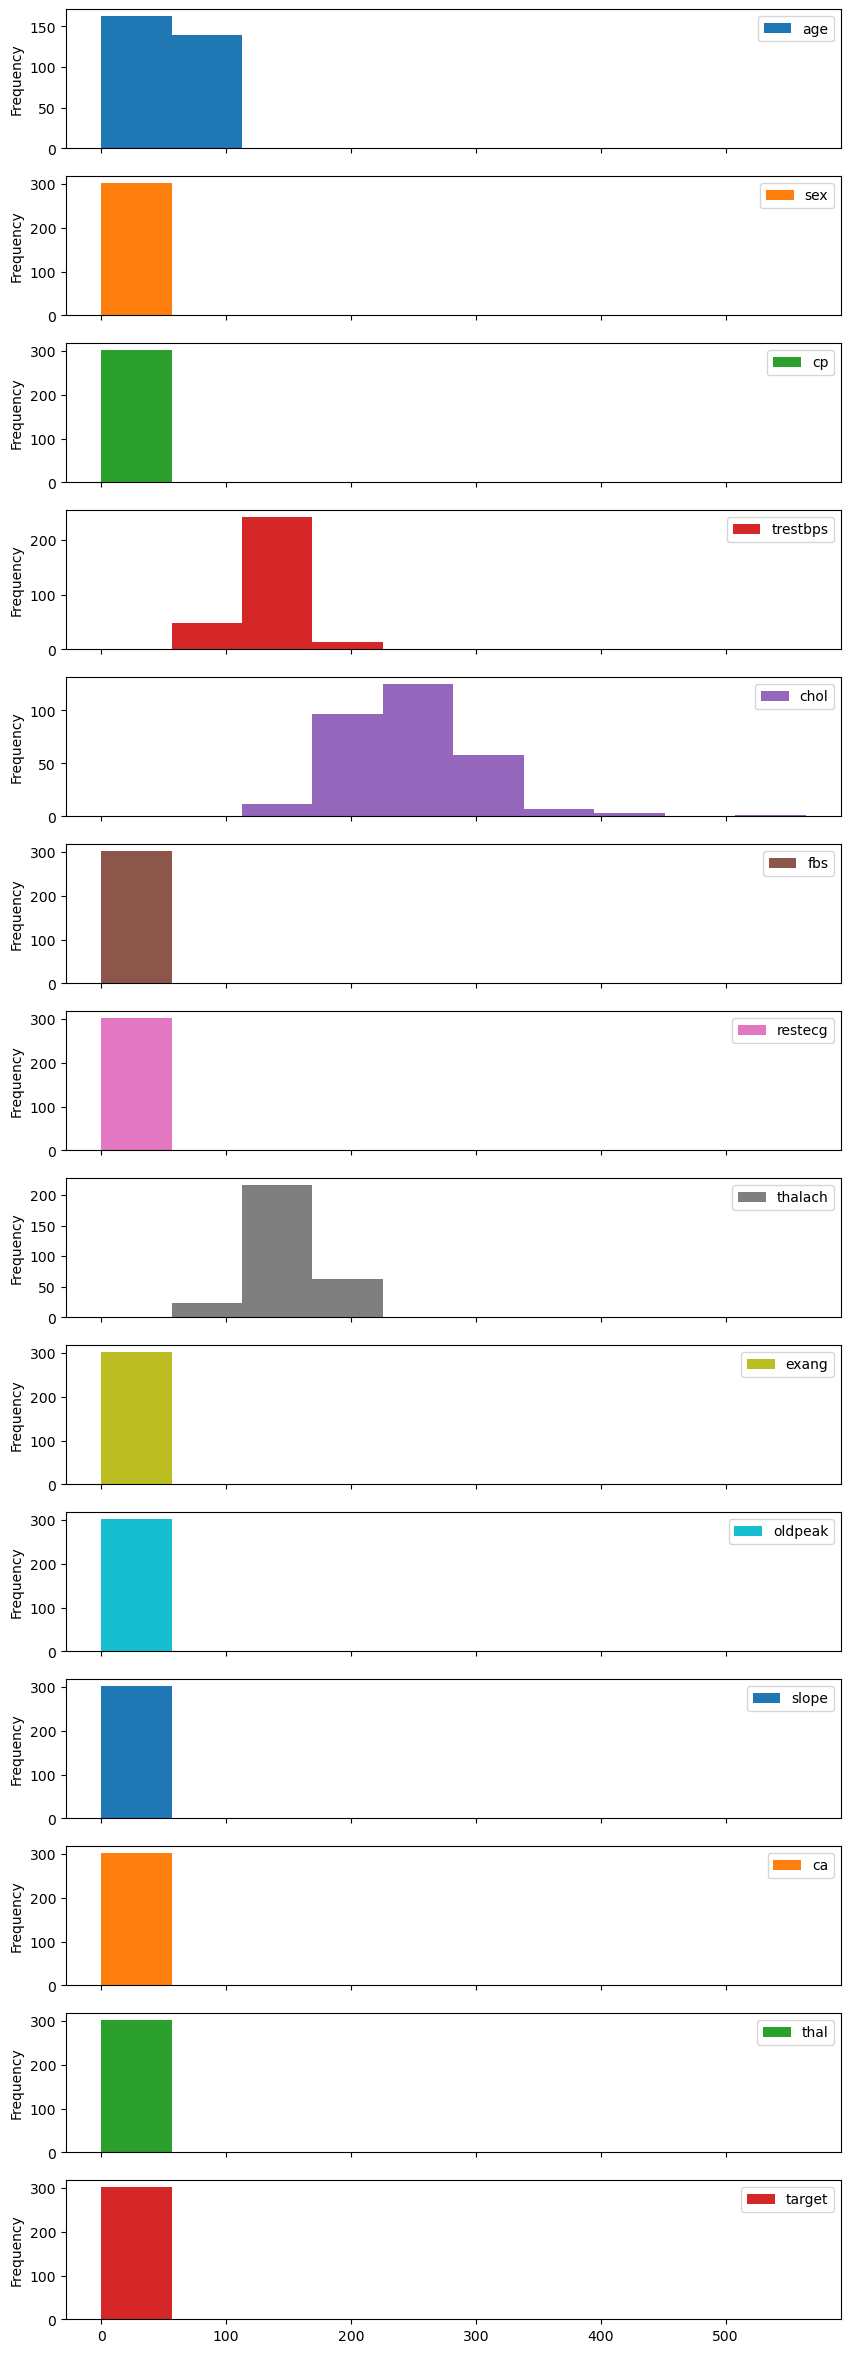

In [35]:
heart_disease.plot.hist(figsize = (10, 30), subplots=True) # subplot parameter allows to plot multiple graphs at once

In [36]:
over_fifty_plot = heart_disease[heart_disease["age"] > 50] # Pandas will take care of the fact that this should be executed in per raw order.
over_fifty_plot.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


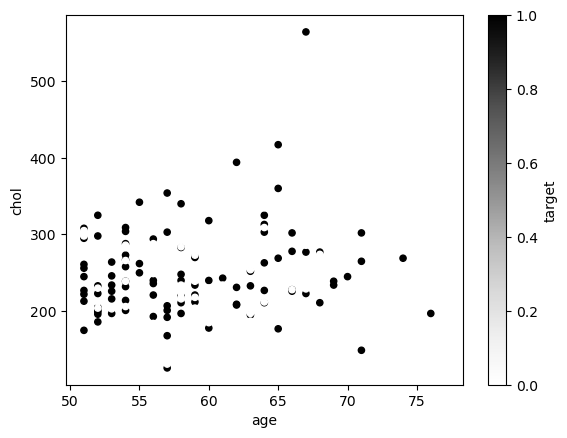

In [37]:
# Pyplot method to make things easy
over_fifty_plot.plot(
    kind = "scatter",
    x = 'age',
    y = 'chol',
    c = 'target'
);

(45.0, 100.0)

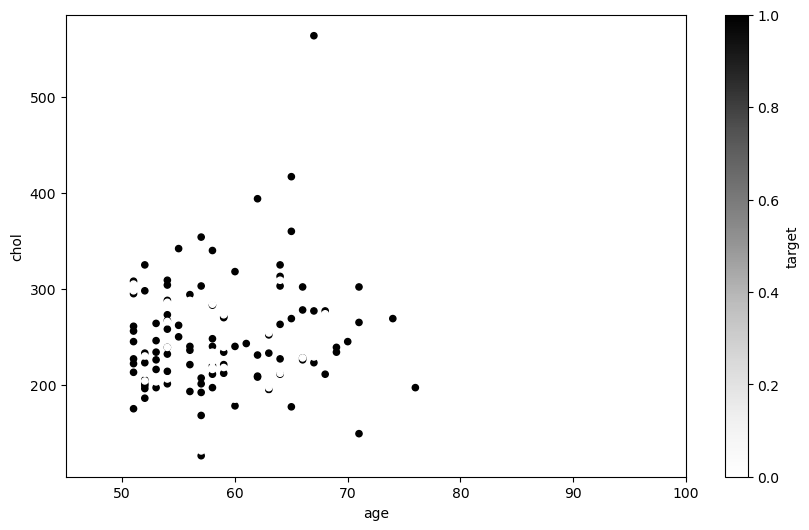

In [38]:
# Since this is not helping let's go the OOP questions.(Not the fully OOP approach in this case)
fig, ax = plt.subplots(figsize = (10, 6))
over_fifty_plot.plot(
    kind='scatter',
    x='age',
    y='chol',
    c='target',
    ax=ax, #Notice that we are setting the axis here
)
ax.set_xlim([45, 100]) # This is used to specify how long an axis is

In this case:
```
scatter = ax.scatter(
    x=over_50["age"],
    y=over_50["chol"],
    c=over_50["target"]
)
```

🔹 What c means:

c stands for color — it controls how each point is colored on the plot.

You can pass a single color (like "red" or "blue") — then all points will be that color.

OR, you can pass an array or Series (like over_50["target"]), and Matplotlib will color points differently based on those values.

Text(0.5, 0.98, 'This is the super title')

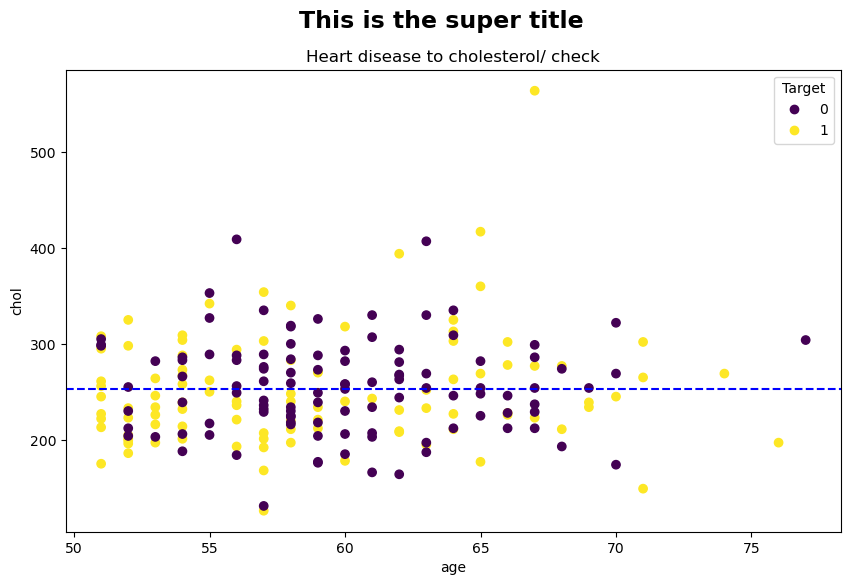

In [51]:
# OOP from scratch

fig, ax = plt.subplots(figsize = (10, 6))
scatterData = ax.scatter(
    x=over_fifty_plot["age"],
    y=over_fifty_plot["chol"],
    c = over_fifty_plot["target"],
)

# Customizing the plot
ax.set(
    title = "Heart disease to cholesterol/ check",
    xlabel = "age",
    ylabel = "chol",
)

# We use this to define a key on the scatter plot
ax.legend(
    *scatterData.legend_elements(),
    title = "Target"
)

# Let's just add a line
ax.axhline(over_fifty_plot["chol"].mean(), ls="--", c="blue")

# Adding a bigger title for the who fig (not just the axis)
fig.suptitle("This is the super title", fontsize = 17, fontweight = "bold")


x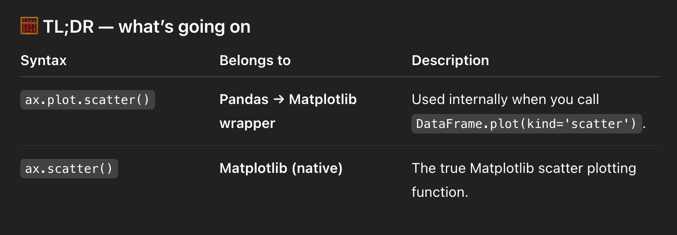

📘 Note on sharex=True
When `sharex=True` is used in `plt.subplots()`, all subplots share the same X-axis.
This means:
  • They share the same X-axis labels and tick marks.
  • Zooming or panning one subplot affects the others.
  • The X-axis range (xlim) is synchronized across all subplots.
Each subplot still keeps its own Y-axis and Y-axis range, unless `sharey=True` is also set.


## Styling things up :)

In [52]:
# To view all the available styles
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

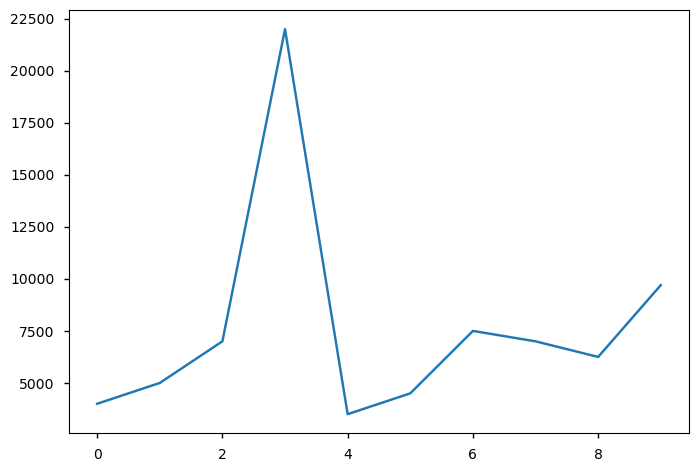

In [61]:
df["Price"].plot();

In [69]:
# Setting a style for plt.
plt.style.use("seaborn-v0_8")

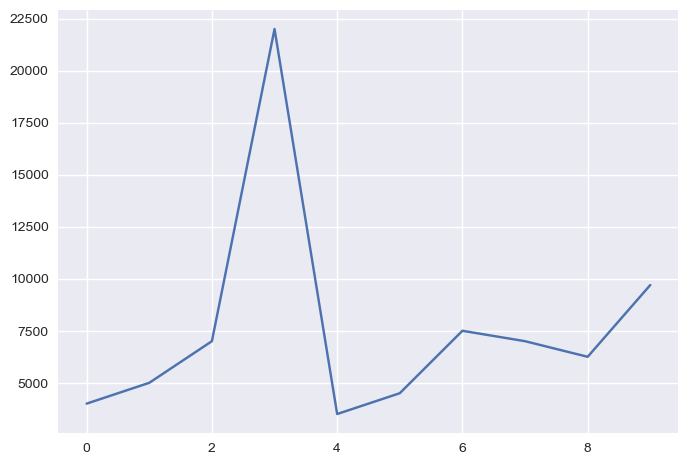

In [70]:
df["Price"].plot();

Text(0.5, 0.98, 'This is the super title')

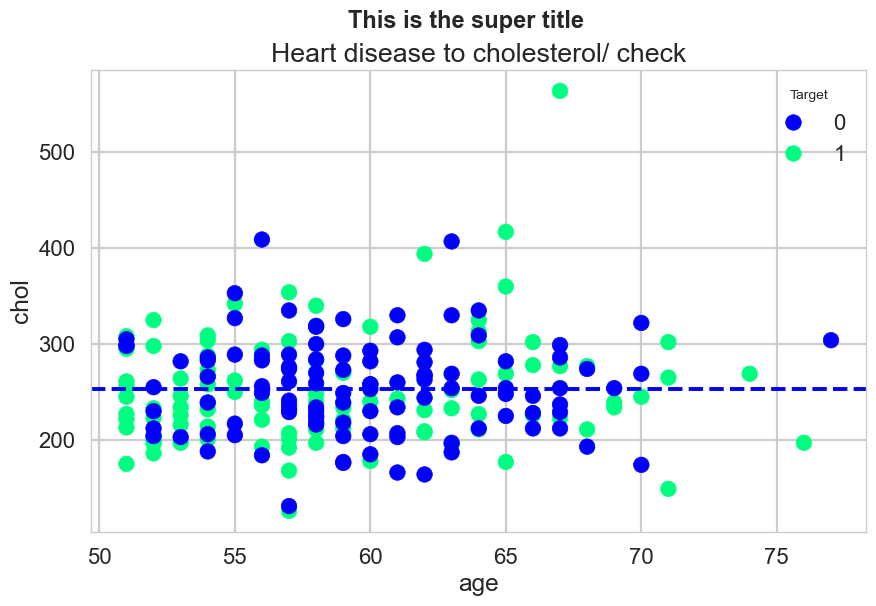

In [78]:
## setting the style further

plt.style.use("seaborn-v0_8-whitegrid")

fig, ax = plt.subplots(figsize = (10, 6))
scatterData = ax.scatter(
    x=over_fifty_plot["age"],
    y=over_fifty_plot["chol"],
    c = over_fifty_plot["target"],
    cmap = "winter", # specifying the color profile
)

# Customizing the plot
ax.set(
    title = "Heart disease to cholesterol/ check",
    xlabel = "age",
    ylabel = "chol",
)

# We use this to define a key on the scatter plot
ax.legend(
    *scatterData.legend_elements(),
    title = "Target"
)

# Let's just add a line
ax.axhline(over_fifty_plot["chol"].mean(), ls="--", c="blue")

# Adding a bigger title for the who fig (not just the axis)
fig.suptitle("This is the super title", fontsize = 17, fontweight = "bold")


In [80]:
# Saving a graph
fig.savefig("Exports/MatPlotGraph.png")